In [13]:
from transformers import AutoTokenizer, AutoModelForCausalLM

model_name = "deepseek-ai/deepseek-coder-1.3b-base"  # small-ish
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForCausalLM.from_pretrained(model_name)

In [2]:
# Encode some text into tokens
text = "你好世界"
tokens = tokenizer.encode(text)
print(tokens)

# Decode back into text
decoded = tokenizer.decode(tokens)
print(decoded)

# Inspect how it split the text
print([tokenizer.decode([t]) for t in tokens])


[32013, 1367, 1248, 4986]
<｜begin▁of▁sentence｜>你好世界
['<｜begin▁of▁sentence｜>', '你', '好', '世界']


In [3]:
# convert ids -> token strings
tokens = [32013, 1367, 1248, 4986]
print(tokenizer.convert_ids_to_tokens(tokens))

# vocab size and specials
print("vocab size:", tokenizer.vocab_size)
print("all special tokens:", tokenizer.all_special_tokens)
print("special tokens map:", tokenizer.special_tokens_map)

# encode without adding special tokens (if you don't want BOS/EOS)
tokens = tokenizer.encode("你好世界", add_special_tokens=False)
print(tokens)

# show ID -> decoding for each id (what you already saw)
print([tokenizer.decode([t]) for t in tokens])

['<｜begin▁of▁sentence｜>', 'ä½ł', 'å¥½', 'ä¸ĸçķĮ']
vocab size: 32000
all special tokens: ['<｜begin▁of▁sentence｜>', '<｜end▁of▁sentence｜>']
special tokens map: {'bos_token': '<｜begin▁of▁sentence｜>', 'eos_token': '<｜end▁of▁sentence｜>', 'pad_token': '<｜end▁of▁sentence｜>'}
[1367, 1248, 4986]
['你', '好', '世界']


In [4]:
with open("再别康桥.txt", "r") as f:
    text = f.read()
tokens = tokenizer.encode(text)
for t in tokens:
    print("token id:", t, "token str:", tokenizer.decode([t]))
print("length of tokens:", len(tokens))

token id: 32013 token str: <｜begin▁of▁sentence｜>
token id: 4642 token str: 轻
token id: 4642 token str: 轻
token id: 337 token str: 的
token id: 848 token str: 我
token id: 26388 token str: 走了
token id: 19385 token str: ，
token id: 185 token str: 

token id: 2198 token str: 正
token id: 1410 token str: 如
token id: 848 token str: 我
token id: 4642 token str: 轻
token id: 4642 token str: 轻
token id: 337 token str: 的
token id: 908 token str: 来
token id: 1989 token str: ；
token id: 185 token str: 

token id: 848 token str: 我
token id: 4642 token str: 轻
token id: 4642 token str: 轻
token id: 337 token str: 的
token id: 6716 token str: 招
token id: 1897 token str: 手
token id: 19385 token str: ，
token id: 185 token str: 

token id: 1147 token str: 作
token id: 2501 token str: 别
token id: 2787 token str: 西
token id: 17881 token str: 天的
token id: 5973 token str: 云
token id: 7817 token str: 彩
token id: 397 token str: 。
token id: 185 token str: 

token id: 185 token str: 

token id: 1865 token str: 那
token 

In [5]:
from transformers import AutoTokenizer

tokenizer_gemma = AutoTokenizer.from_pretrained("google/gemma-2b")

In [6]:
tokens = tokenizer_gemma.encode(text)
print("vocab size:", tokenizer_gemma.vocab_size)
for t in tokens:
    print("token id:", t, "token str:", tokenizer_gemma.decode([t]))
print("length of tokens:", len(tokens))

vocab size: 256000
token id: 2 token str: <bos>
token id: 79424 token str: 轻轻
token id: 153698 token str: 的我
token id: 44913 token str: 走了
token id: 235365 token str: ，
token id: 108 token str: 

token id: 161181 token str: 正如
token id: 235509 token str: 我
token id: 79424 token str: 轻轻
token id: 235370 token str: 的
token id: 235547 token str: 来
token id: 236334 token str: ；
token id: 108 token str: 

token id: 235509 token str: 我
token id: 79424 token str: 轻轻
token id: 235370 token str: 的
token id: 237219 token str: 招
token id: 235616 token str: 手
token id: 235365 token str: ，
token id: 108 token str: 

token id: 235591 token str: 作
token id: 236273 token str: 别
token id: 235990 token str: 西
token id: 55881 token str: 天的
token id: 236537 token str: 云
token id: 236729 token str: 彩
token id: 235362 token str: 。
token id: 109 token str: 


token id: 235779 token str: 那
token id: 236811 token str: 河
token id: 241225 token str: 畔
token id: 172765 token str: 的金
token id: 238110 token str: 柳


In [3]:
import torch
# Example with DeepSeek

# Your input so far (the context)
inputs = tokenizer(text, return_tensors="pt")

# Run the model
with torch.no_grad():
    outputs = model(**inputs)

# Get logits for the next token prediction
logits = outputs.logits[0, -1, :]  # last token's logits
print(logits.shape)  # should be (vocab_size,)
# print top 10 logits
print(torch.topk(logits, 10))
probs = torch.softmax(logits, dim=-1)

# Find top probable tokens
top_probs, top_indices = torch.topk(probs, 10)
for i, p in zip(top_indices, top_probs):
    print(f"{tokenizer.decode(i)}: {p.item():.5f}")


NameError: name 'tokenizer' is not defined

In [19]:
# test on this alphabet:
alphabet = ["<EOF>", "a", "e", "i", "o", "u"]
probabilities = [0.1, 0.2, 0.3, 0.15, 0.15, 0.1]
symbol_to_id = {s: i for i, s in enumerate(alphabet)}
message = ["u", "o", "o", "e", "u", "i", "a", "<EOF>"]

import encoder

enc = encoder.Encoder()
for symbol in message:
    id = symbol_to_id[symbol]
    enc.encode(symbol, id, probabilities)
print(enc.get_encoded_bytes())  # print as integer






b'\xfc\xd1\xa7'


In [2]:
from encoder import Encoder
from decoder import Decoder
from arithmetic_coding import Coder
from bitReadWrite import BitReader, BitWriter

# Jupyter test cell: end-to-end encode/decode using your Coder / Encoder / Decoder classes.
# Paste this cell below where you have defined or imported Coder, Encoder, Decoder.

from typing import List
import bisect

# -------------------------
# Small helpers (copy into cell so test is self-contained)
# -------------------------
def probs_to_counts_largest_remainder(probs: List[float], slots: int) -> List[int]:
    """Deterministic mapping of floats -> integer counts summing to exactly 'slots'."""
    if len(probs) == 0:
        raise ValueError("Empty probability list")
    raw = [float(p) for p in probs]
    s = sum(raw)
    if s <= 0:
        raise ValueError("Probabilities must sum to > 0")
    scaled = [r * slots / s for r in raw]
    floors = [int(x) for x in scaled]
    remainder = slots - sum(floors)
    fracs = sorted(((i, scaled[i] - floors[i]) for i in range(len(probs))),
                   key=lambda x: x[1], reverse=True)
    i = 0
    while remainder > 0 and i < len(fracs):
        floors[fracs[i][0]] += 1
        remainder -= 1
        i += 1
    # safety: if a nonzero prob got zero count we must increase slots/precision
    for p, c in zip(raw, floors):
        if p > 0.0 and c == 0:
            raise ValueError("Precision too low: a nonzero probability mapped to 0 count")
    return floors

def counts_to_cum_desc(counts: List[int]) -> List[int]:
    """Convert counts -> descending cumulative array used by CACM: cum_desc[0]=total, cum_desc[-1]=0."""
    total = sum(counts)
    cum = [total]
    s = 0
    for c in counts:
        s += c
        cum.append(total - s)
    return cum  # length n+1, cum[0]=total, cum[n]=0


# -------------------------
# Test config (your example)
# -------------------------
alphabet = ['a', 'e', 'i', 'o', 'u', '<EOF>']
probs = [0.1, 0.2, 0.3, 0.15, 0.15, 0.1]
message = ["u", "o", "o", "e", "u", "i", "a", "<EOF>"]

# -------------------------
# Ensure Coder / Encoder / Decoder exist (user's classes)
# -------------------------
if 'Coder' not in globals():
    raise RuntimeError("Coder class not found in notebook scope. Define/import Coder before running this cell.")
if 'Encoder' not in globals():
    raise RuntimeError("Encoder class not found in notebook scope. Define/import Encoder before running this cell.")
if 'Decoder' not in globals():
    raise RuntimeError("Decoder class not found in notebook scope. Define/import Decoder before running this cell.")

# -------------------------
# Build model counts and cumulative (descending) expected by textbook wrappers
# -------------------------
# instantiate a temporary Coder to choose slots consistent with its precision
temp_coder = globals()['Coder'](b=16)   # choose b=16 for compactness; increase to 32 to match paper if desired
# slots: choose temp_coder.tb ( = 2^b - 1 ) so total fits inside coder precision
slots = temp_coder.tb
counts = probs_to_counts_largest_remainder(probs, slots)
cum_desc = counts_to_cum_desc(counts)

print("Model counts (first few):", counts[:6], "sum:", sum(counts))
print("cum_desc[0] (total):", cum_desc[0])

# -------------------------
# ENCODING (use Coder.storeRegion directly to avoid wrapper convention mismatch)
# -------------------------
coder_enc = globals()['Coder'](b=16)
bw = BitWriter()

# prime the encoder (your Coder method is start_encode)
if hasattr(coder_enc, 'start_encode'):
    coder_enc.start_encode(bw)
else:
    raise RuntimeError("Coder missing start_encode; adapt call to your API.")

sym_to_idx = {s: i for i, s in enumerate(alphabet)}

# perform symbol-by-symbol encoding using textbook descending cum_desc convention
for sym in message:
    idx = sym_to_idx[sym]
    l = cum_desc[idx + 1]
    h = cum_desc[idx]
    # call the exact method you defined earlier
    coder_enc.storeRegion(l, h)

# finalize encoder and flush bit-writer
coder_enc.finish_encode()
bw.flush(padbit=0)   # your BitWriter implementation expects padbit param
encoded_bytes = bw.getvalue()
print("Encoded bytes (hex):", encoded_bytes.hex())
print("Encoded bitstring (bytes*8 bits shown):", ''.join(f'{b:08b}' for b in encoded_bytes))

# diagnostic: print coder_enc internal state after encoding finishes
print("After encoding: encoder L=", coder_enc.L, "R=", coder_enc.R, "bits_waiting=", coder_enc.bits_waiting)
# prime a new decoder and print its initial state
coder_dec = globals()['Coder'](b=16)
coder_dec.start_decode(BitReader(encoded_bytes))
print("Decoder primed: L=", coder_dec.L, "D=", coder_dec.D, "R=", coder_dec.R)


# -------------------------
# DECODING (direct Coder usage — uses attributes L,R,D and loadRegion)
# -------------------------
coder_dec = globals()['Coder'](b=16)
br = BitReader(encoded_bytes)

# prime decoder
if hasattr(coder_dec, 'start_decode'):
    coder_dec.start_decode(br)
else:
    raise RuntimeError("Coder missing start_decode; adapt call to your API.")

decoded = []
for i in range(len(message)):
    # read the current integer range and target using the Coder attributes
    R = coder_dec.R
    target = coder_dec.D - coder_dec.L
    total = cum_desc[0]

    # defensive checks
    if R <= 0:
        raise RuntimeError(f"Decoder: invalid R={R} at step {i}")
    if not (0 <= target < R):
        raise RuntimeError(f"Decoder invalid target={target} at step {i} (L={coder_dec.L}, D={coder_dec.D}, R={R})")

    # textbook mapping to integer count
    count = ((target + 1) * total - 1) // R

    # find symbol s with cum_desc[s+1] <= count < cum_desc[s]
    s_found = None
    for s in range(len(cum_desc) - 1):
        if cum_desc[s + 1] <= count < cum_desc[s]:
            s_found = s
            break
    if s_found is None:
        s_found = len(cum_desc) - 2

    # update coder state by loading the symbol's region
    l = cum_desc[s_found + 1]
    h = cum_desc[s_found]
    coder_dec.loadRegion(l, h)

    decoded.append(alphabet[s_found])
    print(f"decoded step {i}: idx={s_found}, symbol={alphabet[s_found]}")

print("Decoded message:", decoded)
print("Round-trip OK?", decoded == message)


Model counts (first few): [6554, 13107, 19661, 9830, 9830, 6553] sum: 65535
cum_desc[0] (total): 65535
Encoded bytes (hex): 5400
Encoded bitstring (bytes*8 bits shown): 0101010000000000
After encoding: encoder L= 0 R= 32768 bits_waiting= 0
Decoder primed: L= 0 D= 21504 R= 65536
decoded step 0: idx=3, symbol=o
decoded step 1: idx=2, symbol=i


RuntimeError: Decoder invalid target=-15971 at step 2 (L=58979, D=43008, R=19661)

In [ ]:
from utils import probs_to_counts_largest_remainder, counts_to_cum_desc
from arithmetic_coding import Coder
from encoder import Encoder
from decoder import Decoder
from bitReadWrite import BitReader, BitWriter

alphabet = ['a', 'e', 'i', 'o', 'u', '<EOF>']
probs = [0.1, 0.2, 0.3, 0.15, 0.15, 0.1]
message = ["u", "o", "o", "e", "u", "i", "a", "<EOF>"]

# choose precision b=32 for quickness
coder_temp = Coder(b=32)
slots = coder_temp.tb  # = 2^b - 1
counts = probs_to_counts_largest_remainder(probs, slots)
cum_desc = counts_to_cum_desc(counts)

print("Model counts:", counts, "total:", cum_desc[0])

# encode
cw = BitWriter()
coder_enc = Coder(b=32)
enc = Encoder(coder_enc, cw)
sym_to_idx = {s: i for i, s in enumerate(alphabet)}
for sym in message:
    idx = sym_to_idx[sym]
    enc.encode_symbol(idx, cum_desc)
enc.finish()
cw.flush(padbit=0)
encoded = cw.getvalue()
print("Encoded bytes (hex):", encoded.hex())

# decode
br = BitReader(encoded)
coder_dec = Coder(b=32)
dec = Decoder(coder_dec, br)
decoded = []
for _ in range(len(message)):
    idx = dec.decode_symbol(cum_desc)
    decoded.append(alphabet[idx])
print("Decoded:", decoded)
print("Round-trip OK?", decoded == message)

Model counts: [429496730, 858993459, 1288490189, 644245094, 644245094, 429496729] total: 4294967295
Encoded bytes (hex): dab872
Decoded: ['u', 'o', 'o', 'e', 'u', 'i', 'a', '<EOF>']
Round-trip OK? True


In [6]:
# print special tokens of tokenizer
print(tokenizer.all_special_tokens)

['<｜begin▁of▁sentence｜>', '<｜end▁of▁sentence｜>']


In [2]:
from llm_codec import LLM_Encode
with open("alice29.txt", "r") as f:
    text = f.read()
precision = 128
llm_encoder = LLM_Encode(tokenizer=tokenizer, model=model, precision=precision)
encoded_bytes = llm_encoder.encode(text, demo=False, demo_csv_path="llm_encode_probs.csv")
size_of_original = len(text.encode('utf-8'))
size_of_encoded = len(encoded_bytes)
compression_ratio = size_of_original / size_of_encoded
print(f"Original size (bytes): {size_of_original}")
print(f"Encoded size (bytes): {size_of_encoded}")
print(f"Compression ratio (original/encoded): {compression_ratio:.4f}")
print("Encoded bytes (hex):", encoded_bytes.hex())

Token indices sequence length is longer than the specified maximum sequence length for this model (42272 > 16384). Running this sequence through the model will result in indexing errors


Encoding tokens. Progress:


  0%|          | 0/42273 [00:00<?, ?it/s]huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
  4%|▍         | 1642/42273 [27:34<11:22:20,  1.01s/it]


KeyboardInterrupt: 

In [8]:
# print special tokens of tokenizer
print(tokenizer.all_special_tokens)

['<｜begin▁of▁sentence｜>', '<｜end▁of▁sentence｜>', '<EOF>']


In [4]:
from llm_codec import LLM_Decode
llm_decoder = LLM_Decode(tokenizer=tokenizer, model=model, precision=precision)
decoded_text = llm_decoder.decode(encoded_bytes)
print("Decoded text:", decoded_text)
print("Decoded text matches original?", decoded_text == text)

Decoded text: Shall I compare thee to a summer’s day?
Thou art more lovely and more temperate:
Rough winds do shake the darling buds of May,
And summer’s lease hath all too short a date;
Sometime too hot the eye of heaven shines,
And often is his gold complexion dimm'd;
And every fair from fair sometime declines,
By chance or nature’s changing course untrimm'd;
But thy eternal summer shall not fade,
Nor lose possession of that fair thou ow’st;
Nor shall death brag thou wander’st in his shade,
When in eternal lines to time thou grow’st:
   So long as men can breathe or eyes can see,
   So long lives this, and this gives life to thee.
Decoded text matches original? True


In [9]:
tokenizer2 = AutoTokenizer.from_pretrained(model_name)
model2 = AutoModelForCausalLM.from_pretrained(model_name)

# print special tokens of tokenizer2
print(tokenizer2.all_special_tokens)

llm_decoder = LLM_Decode(tokenizer=tokenizer2, model=model2, precision=precision)
decoded_text = llm_decoder.decode(encoded_bytes)
print("Decoded text:", decoded_text)
print("Decoded text matches original?", decoded_text == text)

print(tokenizer2.all_special_tokens)

['<｜begin▁of▁sentence｜>', '<｜end▁of▁sentence｜>']
Decoded text: 轻轻的我走了，
正如我轻轻的来；
我轻轻的招手，
作别西天的云彩。

那河畔的金柳，
是夕阳中的新娘；
波光里的艳影，
在我的心头荡漾。

软泥上的青荇，
油油的在水底招摇；
在康河的柔波里，
我甘心做一条水草！

那榆荫下的一潭，
不是清泉，是天上虹；
揉碎在浮藻间，
沉淀着彩虹似的梦。

寻梦？撑一支长篙，
向青草更青处漫溯；
满载一船星辉，
在星辉斑斓里放歌。

但我不能放歌，
悄悄是别离的笙箫；
夏虫也为我沉默，
沉默是今晚的康桥！

悄悄的我走了，
正如我悄悄的来；
我挥一挥衣袖，
不带走一片云彩。
Decoded text matches original? True
['<｜begin▁of▁sentence｜>', '<｜end▁of▁sentence｜>', '<EOF>']


In [2]:
print(tokenizer.all_special_tokens)

['<｜begin▁of▁sentence｜>', '<｜end▁of▁sentence｜>']


In [3]:
print(tokenizer.special_tokens_map)

{'bos_token': '<｜begin▁of▁sentence｜>', 'eos_token': '<｜end▁of▁sentence｜>', 'pad_token': '<｜end▁of▁sentence｜>'}


In [35]:
from llm_codec import LLM_Encode
with open("Shall I Compare Thee To a Summer's Day.txt", "r") as f:
    text = f.read()
precision = 128
llm_encoder = LLM_Encode(tokenizer=tokenizer, model=model, precision=precision)
encoded_bytes = llm_encoder.encode(text, demo=True, demo_csv_path="llm_encode_probs.csv")
size_of_original = len(text.encode('utf-8'))
size_of_encoded = len(encoded_bytes)
# compression ratio in bits/byte is
compression_ratio_english_llm = size_of_encoded / (size_of_original * 8)
print(f"Original size (bytes): {size_of_original}")
print(f"Encoded size (bytes): {size_of_encoded}")
print(f"Compression ratio (encoded/original): {compression_ratio_english_llm:.4f}")
print("Encoded bytes (hex):", encoded_bytes.hex())

Encoding tokens. Progress:


100%|██████████| 179/179 [00:57<00:00,  3.10it/s]

Original size (bytes): 638
Encoded size (bytes): 21
Compression ratio (encoded/original): 0.0041
Encoded bytes (hex): 9108f21b545d8a120f1458c148b32ca1a67ab32620


In [18]:
# compare with gzip
import gzip
with open("Shall I Compare Thee To a Summer's Day.txt", "rb") as f:
    original_data = f.read()
compressed_data = gzip.compress(original_data)
# size of original in bits
size_of_original = len(original_data) * 8
# size of gzip compressed in bytes
size_of_gzip = len(compressed_data)
print(f"Gzip compressed size (bytes): {size_of_gzip}")
# compression ratio in bits/byte
compression_ratio_english_gzip = size_of_gzip / size_of_original
print(f"Gzip compression ratio (gzip/original): {compression_ratio_english_gzip:.4f}")

Gzip compressed size (bytes): 382
Gzip compression ratio (gzip/original): 0.0748


In [19]:
# now for 再别康桥.txt
from llm_codec import LLM_Encode
with open("再别康桥.txt", "r") as f:
    text = f.read()
precision = 128
llm_encoder = LLM_Encode(tokenizer=tokenizer, model=model, precision=precision)
encoded_bytes = llm_encoder.encode(text, demo=True, demo_csv_path="llm_encode_probs.csv")
size_of_original = len(text.encode('utf-8'))
size_of_encoded = len(encoded_bytes)
# compression ratio in bits/byte is
compression_ratio_chinese_llm = (size_of_encoded * 8) / size_of_original
print(f"Original size (bytes): {size_of_original}")
print(f"Encoded size (bytes): {size_of_encoded}")
print(f"Compression ratio (encoded/original): {compression_ratio_chinese_llm:.4f}")
print("Encoded bytes (hex):", encoded_bytes.hex())

Encoding tokens. Progress:


100%|██████████| 262/262 [01:35<00:00,  2.76it/s]

Original size (bytes): 705
Encoded size (bytes): 99
Compression ratio (encoded/original): 1.1234
Encoded bytes (hex): a29c16e6ee9b3589ef0f328663a6d35f642218382c5a12098d764de444da88a2adaa328ffd7708197875d0a89eaace822b11ff692e7f1b26deda116b847d6bd1da08f2faa74092706198730c154d52a6046dd5a97c5361de4be1bfee923895c6ee9750


In [20]:
# compare with compression ratio in bits/byte using gzip
import gzip
with open("再别康桥.txt", "rb") as f:
    original_data = f.read()
compressed_data = gzip.compress(original_data)
print(f"Gzip compressed size (bytes): {len(compressed_data)}")
compression_ratio_chinese_gzip = (len(compressed_data) * 8) / len(original_data)
print(f"Gzip compression ratio (compressed/original): {compression_ratio_chinese_gzip:.4f}")

Gzip compressed size (bytes): 455
Gzip compression ratio (compressed/original): 5.1631


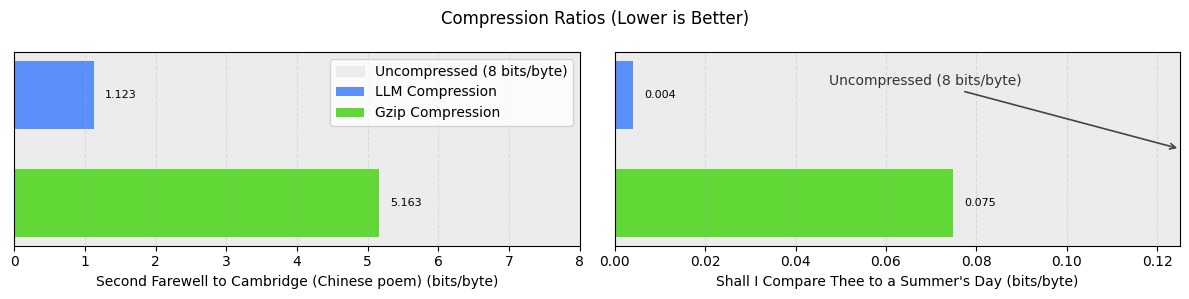

In [33]:
# compare compression ratios with two single-row subplots (baseline fills axis)
import matplotlib.pyplot as plt


def plot_locale(ax, title, llm_ratio, gzip_ratio, xmax):
    baseline = 8.0
    baseline_end = min(baseline, xmax)
    ax.axvspan(0, baseline_end, color="#ececec", label="Uncompressed (8 bits/byte)")
    ax.barh([0.2], [llm_ratio], height=0.25, color="#5b8ff9", label="LLM Compression")
    ax.barh([-0.2], [gzip_ratio], height=0.25, color="#61d836", label="Gzip Compression")
    ax.set_xlim(0, xmax)
    ax.set_yticks([])
    ax.set_xlabel(f"{title} (bits/byte)")
    ax.grid(axis="x", linestyle="--", alpha=0.3)
    offset = xmax * 0.02
    ax.text(min(llm_ratio + offset, xmax), 0.2, f"{llm_ratio:.3f}", va="center", ha="left", fontsize=8)
    ax.text(min(gzip_ratio + offset, xmax), -0.2, f"{gzip_ratio:.3f}", va="center", ha="left", fontsize=8)


fig, axes = plt.subplots(1, 2, figsize=(12, 3), sharey=True)
plot_locale(axes[0], "Second Farewell to Cambridge (Chinese poem)", compression_ratio_chinese_llm, compression_ratio_chinese_gzip, xmax=8.0)
plot_locale(axes[1], "Shall I Compare Thee to a Summer's Day", compression_ratio_english_llm, compression_ratio_english_gzip, xmax=0.125)
axes[1].annotate(
    "Uncompressed (8 bits/byte)",
    xy=(0.125, 0.0),
    xytext=(0.09, 0.25),
    textcoords="data",
    arrowprops={"arrowstyle": "->", "color": "#444", "linewidth": 1.2},
    ha="right",
    va="center",
    fontsize=10,
    color="#333",
)

handles, labels = axes[0].get_legend_handles_labels()
axes[0].legend(handles[:3], labels[:3], loc="upper right")
fig.suptitle("Compression Ratios (Lower is Better)")
plt.tight_layout()
plt.show()

/var/folders/9q/kr6k165j47b7qv4mlqdh4_9r0000gn/T/ipykernel_43786/1079987020.py:23: UserWarning: Glyph 65372 (\N{FULLWIDTH VERTICAL LINE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 65372 (\N{FULLWIDTH VERTICAL LINE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


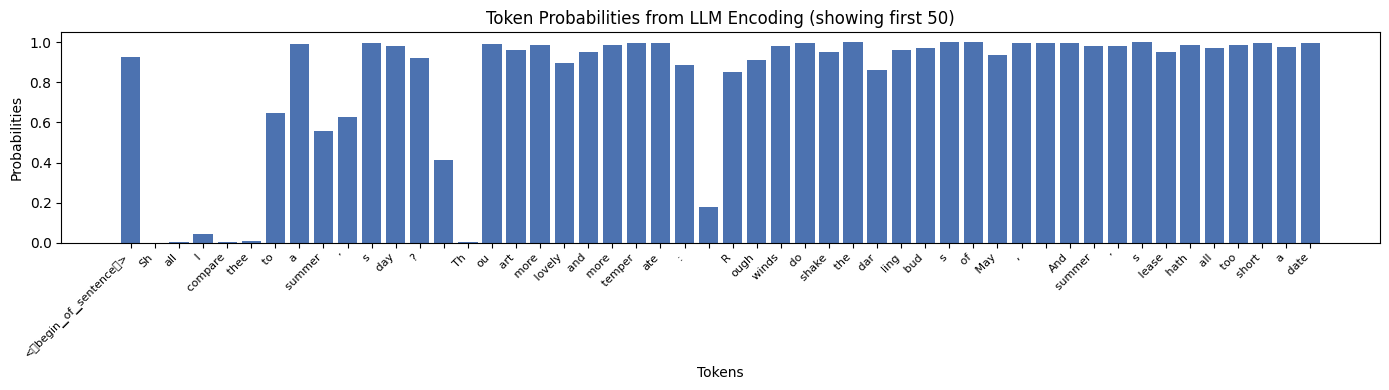

In [37]:
# read llm_encode_probs.csv, plot probabilities vs. token texts, make plot long enough to see all tokens clearly
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("llm_encode_probs.csv")
tokens = df['token_text'].tolist()
probs = df['probability'].tolist()

max_tokens = 50
if len(tokens) > max_tokens:
    tokens = tokens[:max_tokens]
    probs = probs[:max_tokens]
    note = f" (showing first {max_tokens})"
else:
    note = ""

plt.figure(figsize=(14,4))
plt.bar(range(len(tokens)), probs, color="#4c72b0")
plt.xticks(range(len(tokens)), tokens, rotation=45, ha='right', fontsize=8)
plt.xlabel("Tokens")
plt.ylabel("Probabilities")
plt.title(f"Token Probabilities from LLM Encoding{note}")
plt.tight_layout()
plt.show()

In [ ]:
# 再别康桥 compression ratio in bits/byte is 